In [5]:
from datasets import list_datasets

all=list_datasets()
print(all[:10])

#사용 가능한 데이터 셋을 출력해줌 대신 데이터 셋 종류가 많아서 렉이 걸리는지 메모리 많이 잡아 먹으니 
#목록을 확인하고 중단시켜주는거 추천

C:\Users\Owner\AppData\Local\Temp\ipykernel_6192\2021304128.py:3: FutureWarning: list_datasets is deprecated and will be removed in the next major version of datasets. Use 'huggingface_hub.list_datasets' instead.
  all=list_datasets()


['amirveyseh/acronym_identification', 'ade-benchmark-corpus/ade_corpus_v2', 'UCLNLP/adversarial_qa', 'Yale-LILY/aeslc', 'nwu-ctext/afrikaans_ner_corpus', 'fancyzhx/ag_news', 'allenai/ai2_arc', 'google/air_dialogue', 'komari6/ajgt_twitter_ar', 'legacy-datasets/allegro_reviews']


In [1]:
from datasets import load_dataset

emo=load_dataset("emotion")
emo
'''
dict 자료로 key=[train,validation,test] 3개로 구성 이걸로 학습 시키면 될듯?
'''

E:\anaconda\envs\prac\lib\site-packages\requests\__init__.py:86: RequestsDependencyWarning: Unable to find acceptable character detection dependency (chardet or charset_normalizer).
  warnings.warn(
E:\anaconda\envs\prac\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
E:\anaconda\envs\prac\lib\site-packages\datasets\load.py:1491: FutureWarning: The repository for emotion contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at https://hf.co/datasets/emotion
You can avoid this message in future by passing the argument `trust_remote_code=True`.
Passing `trust_remote_code=True` will be mandatory to load this dataset from the next major release of `datasets`.
  warnings.warn(
Generating test split: 100%|██████████| 2000/2000 [00:00<00:00, 66452.84 examples/s]

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 16000
    })
    validation: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
})

In [5]:
print(emo["train"][0])
emo["train"].features
'''
label이 ['sadness', 'joy', 'love', 'anger', 'fear', 'surprise']을 정수형으로 index에 포함됨
'''

{'text': 'i didnt feel humiliated', 'label': 0}


{'text': Value(dtype='string', id=None),
 'label': ClassLabel(names=['sadness', 'joy', 'love', 'anger', 'fear', 'surprise'], id=None)}

In [7]:
import pandas as pd

emo.set_format(type="pandas")
df=emo["train"][:]
df.head()

,text,label
0,i didnt feel humiliated,0
1,i can go from feeling so hopeless to so damned...,0
2,im grabbing a minute to post i feel greedy wrong,3
3,i am ever feeling nostalgic about the fireplac...,2
4,i am feeling grouchy,3


In [8]:
def label_int2str(row):
    return emo["train"].features["label"].int2str(row) #int 타입 데이터를 그에 맞는 label로 바꿔줌 

df["label_name"]=df["label"].apply(label_int2str) #label_name라는 새로운 column을 만들어서 거기에 넣어줌
df.head()

,text,label,label_name
0,i didnt feel humiliated,0,sadness
1,i can go from feeling so hopeless to so damned...,0,sadness
2,im grabbing a minute to post i feel greedy wrong,3,anger
3,i am ever feeling nostalgic about the fireplac...,2,love
4,i am feeling grouchy,3,anger


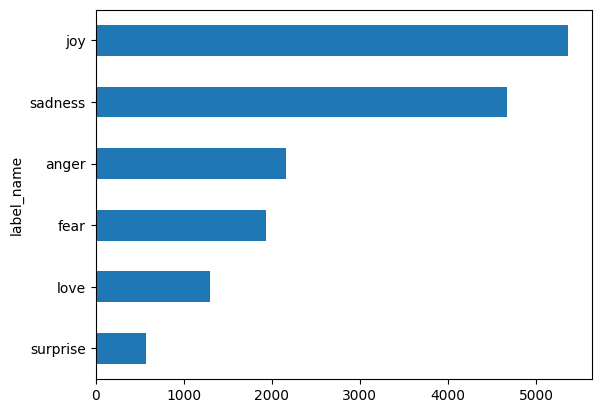

In [9]:
import matplotlib.pyplot as plt

df["label_name"].value_counts(ascending=True).plot.barh() #df.plot()를 하면 따로 plt 안그려도 됨 barh는 가로 막대기 의미
plt.show()

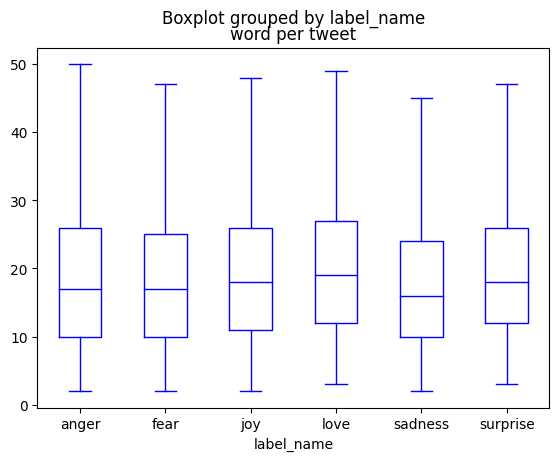

In [10]:
df["word per tweet"]=df["text"].str.split().apply(len)
df.boxplot('word per tweet',by="label_name",grid=False, showfliers=False,color='b')
plt.show()
'''
사용할 모델의 문맥 최대 길이 체크하기 여기서는 대충 25정도 인듯?
만약 더 길다면 잘라내야함
문제는 잘라낸 곳에 중요한 내용이 있다면 큰일남 어떻게 다룰지 생각
'''

In [11]:
emo.reset_format()

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "E:\anaconda\envs\prac\lib\site-packages\transformers\utils\import_utils.py", line 1535, in _get_module
  File "E:\anaconda\envs\prac\lib\importlib\__init__.py", line 127, in import_module
    return _bootstrap._gcd_import(name[level:], package, level)
  File "<frozen importlib._bootstrap>", line 1014, in _gcd_import
  File "<frozen importlib._bootstrap>", line 991, in _find_and_load
  File "<frozen importlib._bootstrap>", line 961, in _find_and_load_unlocked
  File "<frozen importlib._bootstrap>", line 219, in _call_with_frames_removed
  File "<frozen importlib._bootstrap>", line 1014, in _gcd_import
  File "<frozen importlib._bootstrap>", line 991, in _find_and_load
  File "<frozen importlib._bootstrap>", line 975, in _find_and_load_unlocked
  File "<frozen importlib._bootstrap>", line 671, in _load_unlocked
  File "<frozen importlib._bootstrap_external>", line 843, in exec_module
  File "<frozen importlib._bootstrap>", line 219, in _call_wit